# Prostý ohyb

Vypracoval: Filip Horák, 2017/2018

U prutu dle obrázku určte úhel natočení $\varphi$, při kterém začnou vznikat plastické deformace. Při ohybu nedochází k posunu ohýbaného konce ve svislém směru.

## Řešení

Ze začátku je nutné naimportovat potřebné knihovny.

In [1]:
import sympy as sp
from IPython.core.display import Image
sp.init_printing()

Vyvoláme obrázek úlohy.

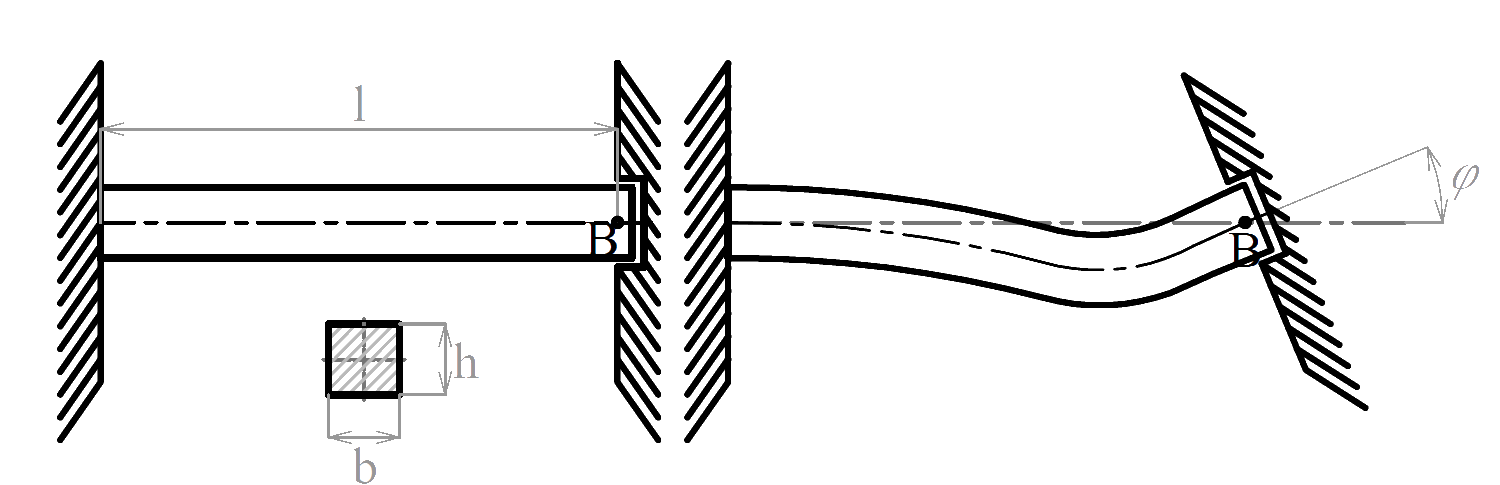

In [2]:
Image(filename='05-o-prosty-1.png', width=800)

Prut částečně uvolníme a zapíšeme deformační podmínky:
$$\begin{align}
w_B & = 0  \\
\varphi_B & = \varphi_{k}
\end{align}$$

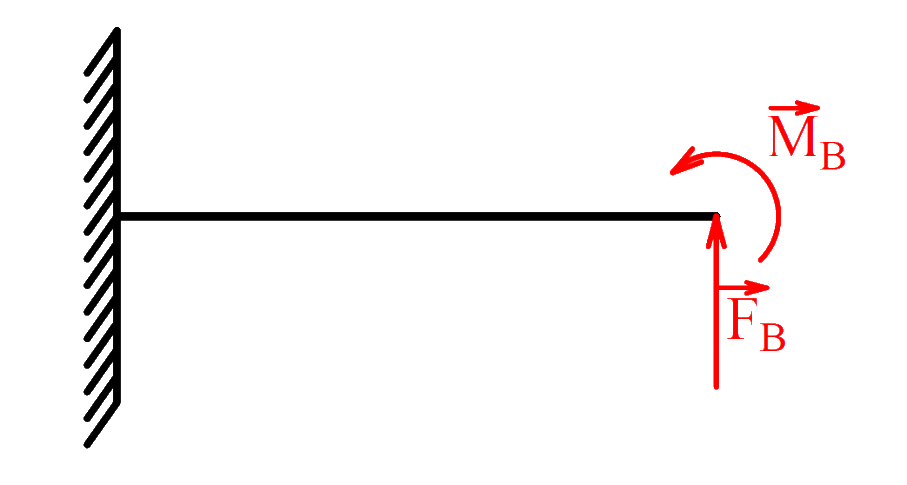

In [3]:
Image(filename='05-o-prosty-2.png', width=400)

Zavedeme potřebné proměnné jako symboly.

In [4]:
x,fik=sp.symbols('x varphi_k')
D,L,h,b=sp.symbols('D L h b')
E,Jy=sp.symbols('E J_y')
MB,FB=sp.symbols('M_B F_B')
sigmax,sigmak,kk=sp.symbols('sigma_max sigma_k k_k')

Vyjádříme momentový vnitřní účinek úseku.

In [5]:
M=MB+FB*x
M

Vyjádříme potenciální energii prutu.

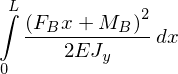

In [6]:
dW=M**2/2/E/Jy
W=sp.Integral(dW,[x,0,L])
W

Vyjádříme parciální derivace energie napjatosti podle síly $F_B$ a podle momentu $M_B$.

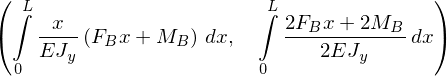

In [7]:
dWFB=W.diff(FB)
dWMB=W.diff(MB)
dWFB,dWMB

Sestavíme deformační podmínky:
$$\begin{align}
\frac{\partial W}{\partial F_B} & = 0  \\
\frac{\partial W}{\partial M_B} & = \varphi_{k}
\end{align}$$

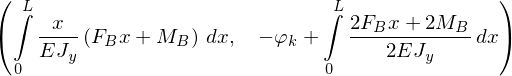

In [8]:
eqn1=dWFB
eqn2=+dWMB-fik
eqn1,eqn2

Rovnice zintegrujeme a vyjádříme $F_B$ a $M_B$.

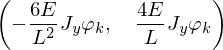

In [9]:
eqn1_=eqn1.doit()
eqn2_=eqn2.doit()
sol1=sp.linsolve([eqn1_,eqn2_],[FB,MB])
FB_sol,MB_sol=next(iter(sol1))
FB_sol,MB_sol

Nyní je nutné nalézt místo s maximálním ohybovým momentem. Průběh ohyboveého momentu je linerání, a proto stačí porovnat pouze hodnoty ohybového momentu v bodech $x = 0$ a $x = L$.

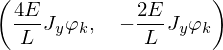

In [10]:
Moy_0=M.subs({x:0,MB:MB_sol,FB:FB_sol})
Moy_L=M.subs({x:L,MB:MB_sol,FB:FB_sol})
Moy_0,Moy_L

Po dosazení vidíme, že největší ohybový moment je na volném konci prutu a jeho hodnota je rovna momentu $M_B$. Dále budeme počítat s touto hodnotou.

Vyjádříme modul průřezu $W_0$ pro obdelníkový průřez.

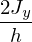

In [11]:
W0=Jy/(h/2)
W0

Sestavíme soustavu rovnic:
$$\begin{align}
\sigma_{max} & = \frac{M_B}{W_0} \\
k_K & = \frac{\sigma_K}{\sigma_{max}}
\end{align}$$

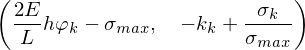

In [12]:
eqn1=MB_sol/W0-sigmax
eqn2=sigmak/sigmax-kk
eqn1,eqn2

Vyjádříme $\varphi_{k}$ a $\sigma_{max}$.

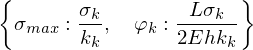

In [13]:
sol2=sp.solve([eqn1,eqn2],[fik,sigmax])
sol2

Zavedeme číselné hodnoty veličin.
$$\begin{align}
L & = 1000\, \mathrm{mm} \\
h & = 20\, \mathrm{mm} \\
b & = 20\, \mathrm{mm} \\
E & = 2.1\cdot 10^5\, \mathrm{MPa} \\
\sigma_K & = 350\, \mathrm{MPa} \\
k_K & = 1
\end{align}$$

In [14]:
L_=1000.
h_=20.
b_=20.
E_=2.1e5
sigmak_=250
kk_=1

Spočteme úhel natočení ve stupních při kterém dojde ke vzniku plastických deformací.

In [15]:
fik_max=sol2[fik].subs({h:h_,L:L_,b:b_,E:E_,sigmak:sigmak_,kk:kk_})
fik_=fik_max*180/sp.pi
sp.N(fik_,4)